In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [16]:
x_train = x_train / 255
x_test = x_test / 255

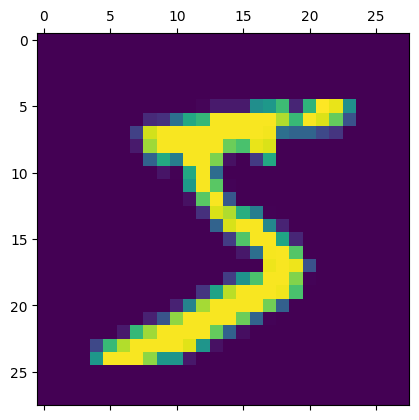

In [17]:
plt.matshow(x_train[0])

In [18]:
x_train_flattened = x_train.reshape(len(x_train), 28 * 28)
x_test_flattened = x_test.reshape(len(x_test), 28 * 28)


In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4652 - accuracy: 0.8795
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3034 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2826 - accuracy: 0.9215
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2668 - accuracy: 0.9256


In [20]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2665 - accuracy: 0.9268


[0.2665025591850281, 0.926800012588501]

In [21]:
y_pred = model.predict(x_test_flattened)
y_pred[0]

313/313 [==============================] - 1s 3ms/step


array([2.1737263e-02, 3.6921978e-07, 7.9731584e-02, 9.4952571e-01,
       2.2564621e-03, 1.3990930e-01, 1.9332110e-06, 9.9978596e-01,
       9.4849624e-02, 6.4304996e-01], dtype=float32)

In [23]:
y_test[0]

7

In [24]:
np.argmax(y_pred[0])

7

In [26]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[0:5]

[7, 2, 1, 0, 4]

In [28]:
cm = tf.math.confusion_matrix(y_test, y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   7,    9,  922,   15,   10,    5,   13,   10,   38,    3],
       [   4,    0,   18,  916,    0,   28,    2,   12,   21,    9],
       [   2,    1,    3,    1,  923,    0,   10,    3,   10,   29],
       [   9,    2,    3,   21,    9,  795,   13,    5,   28,    7],
       [  12,    3,    6,    1,    7,   16,  909,    2,    2,    0],
       [   1,    5,   22,    7,    9,    1,    0,  951,    2,   30],
       [   8,    7,    7,   18,    9,   29,    8,   11,  869,    8],
       [  11,    7,    1,    9,   40,    7,    0,   23,    5,  906]],
      dtype=int32)>

<Axes: >

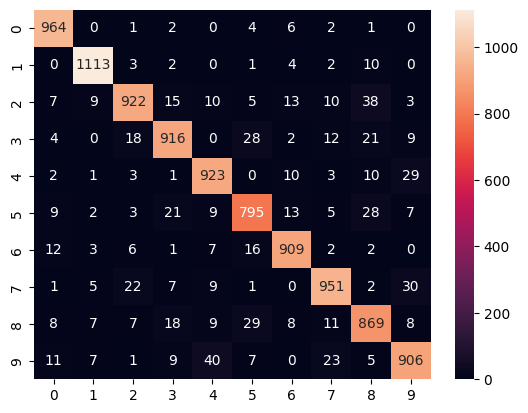

In [30]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2750 - accuracy: 0.9226
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1225 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0856 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0648 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0518 - accuracy: 0.9835


In [33]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0824 - accuracy: 0.9755


[0.08238808810710907, 0.9754999876022339]

In [34]:
cm = tf.math.confusion_matrix(y_test, y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   7,    9,  922,   15,   10,    5,   13,   10,   38,    3],
       [   4,    0,   18,  916,    0,   28,    2,   12,   21,    9],
       [   2,    1,    3,    1,  923,    0,   10,    3,   10,   29],
       [   9,    2,    3,   21,    9,  795,   13,    5,   28,    7],
       [  12,    3,    6,    1,    7,   16,  909,    2,    2,    0],
       [   1,    5,   22,    7,    9,    1,    0,  951,    2,   30],
       [   8,    7,    7,   18,    9,   29,    8,   11,  869,    8],
       [  11,    7,    1,    9,   40,    7,    0,   23,    5,  906]],
      dtype=int32)>

<Axes: >

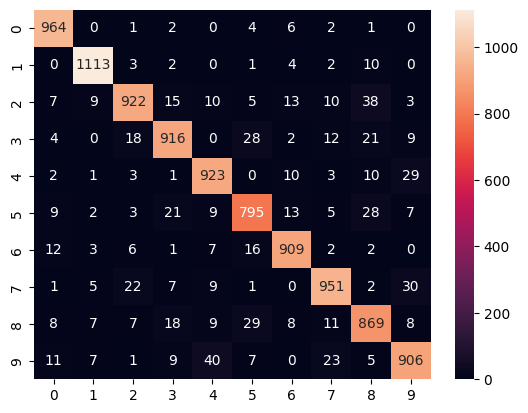

In [35]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2785 - accuracy: 0.9205
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1261 - accuracy: 0.9624
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0888 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0682 - accuracy: 0.9789
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0545 - accuracy: 0.9832


In [39]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0824 - accuracy: 0.9745


[0.08244204521179199, 0.9745000004768372]

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 19s 9ms/step - loss: 0.2060 - accuracy: 0.9378
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0942 - accuracy: 0.9713
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0648 - accuracy: 0.9794
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0542 - accuracy: 0.9838
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0410 - accuracy: 0.9880


In [42]:
y_pred = model.predict(x_test)
y_pred[0]

313/313 [==============================] - 2s 4ms/step


array([1.3565242e-08, 2.3339237e-05, 3.2714461e-06, 2.2589504e-06,
       5.0889966e-08, 6.8385138e-09, 7.5464870e-11, 9.9995619e-01,
       7.9502691e-08, 1.4680030e-05], dtype=float32)

In [43]:
np.argmax(y_pred[0])

7

<Axes: >

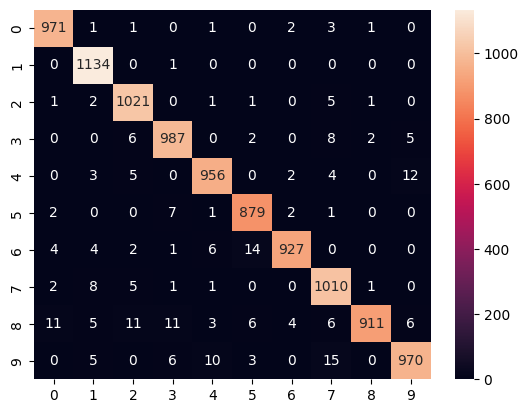

In [45]:
cm = tf.math.confusion_matrix(y_test, np.argmax(y_pred, axis=1))

import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')